In [24]:
import pandas as pd
file_path = '/content/train_data.xlsx'  # Update with the correct path to your file

# Load the Excel file and check the sheet names
excel_file = pd.ExcelFile(file_path)
print(excel_file.sheet_names)


['Train']


In [53]:
import pandas as pd

# Correct file path and sheet name
file_path = '/content/train_data.xlsx'
train_data = pd.read_excel(file_path, sheet_name='Train')


In [54]:
print(type(train_data))


<class 'pandas.core.frame.DataFrame'>


In [35]:
print(train_data.head())  # Displays the first few rows of the DataFrame
print(train_data.columns)  # Lists all column names


   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Indivi

In [40]:
continuous_vars = ['cibil_score', 'loan_amnt', 'int_rate', 'annual_inc', 'account_bal']
for column in continuous_vars:
    if column not in train_data.columns:
        print(f"Column '{column}' not found in train_data")


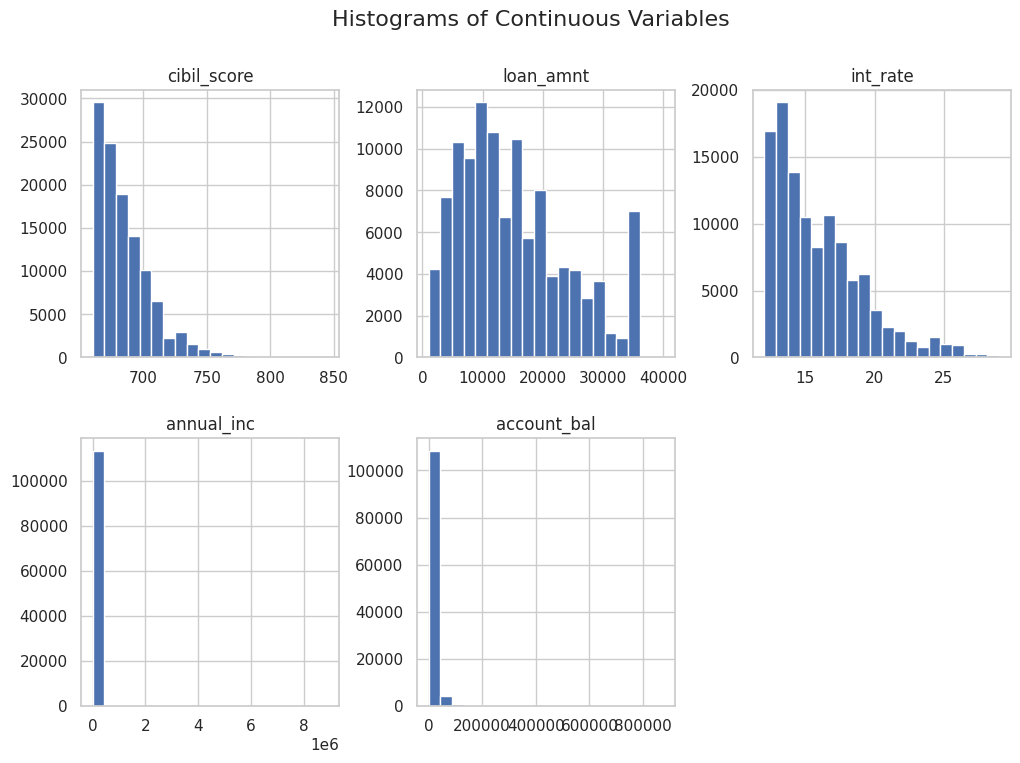

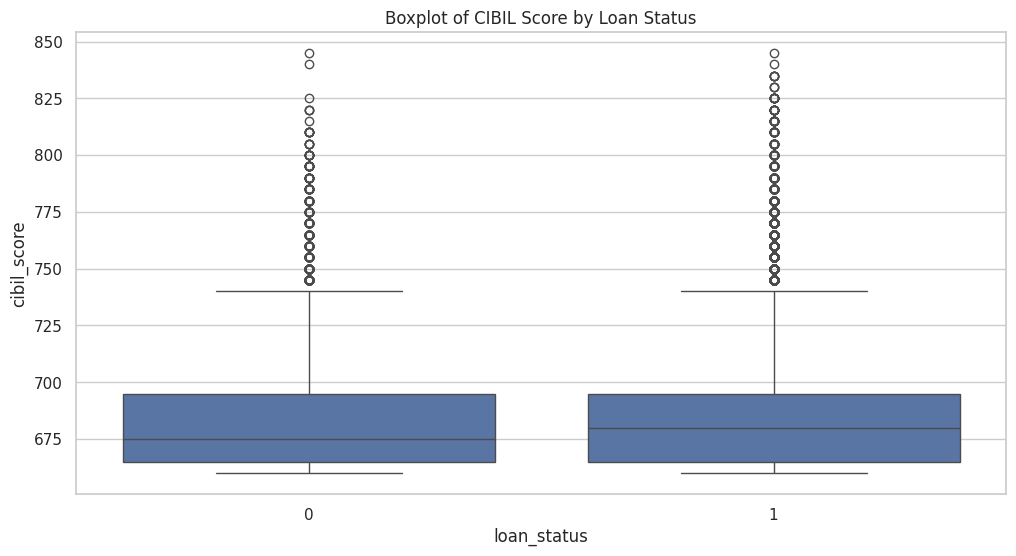

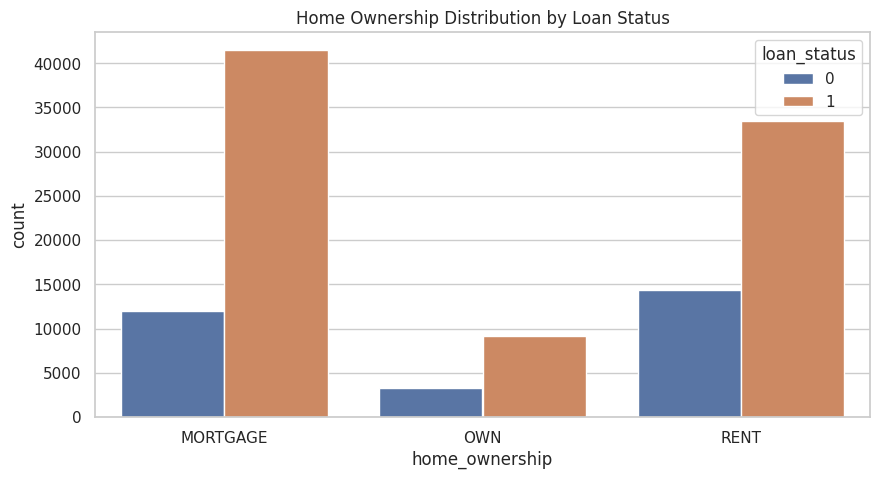

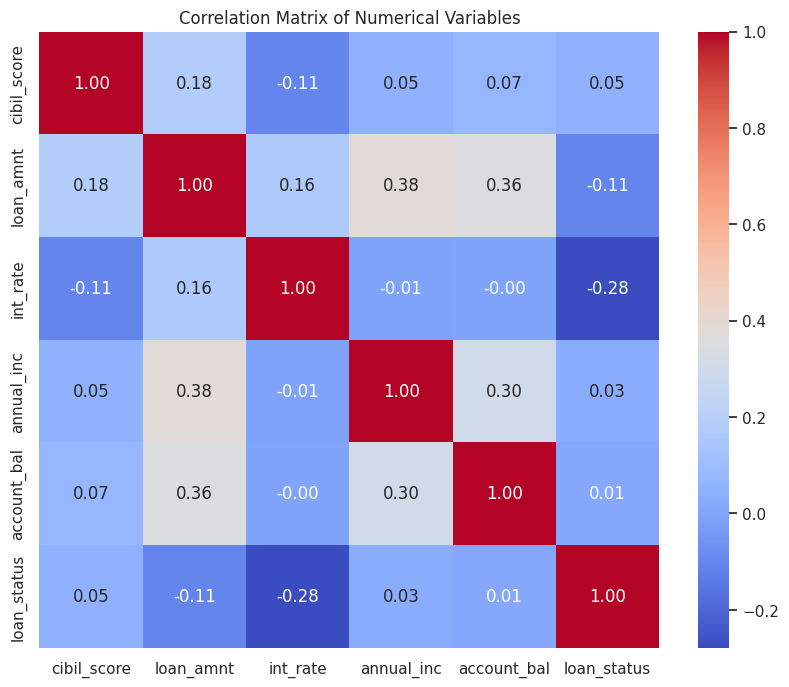

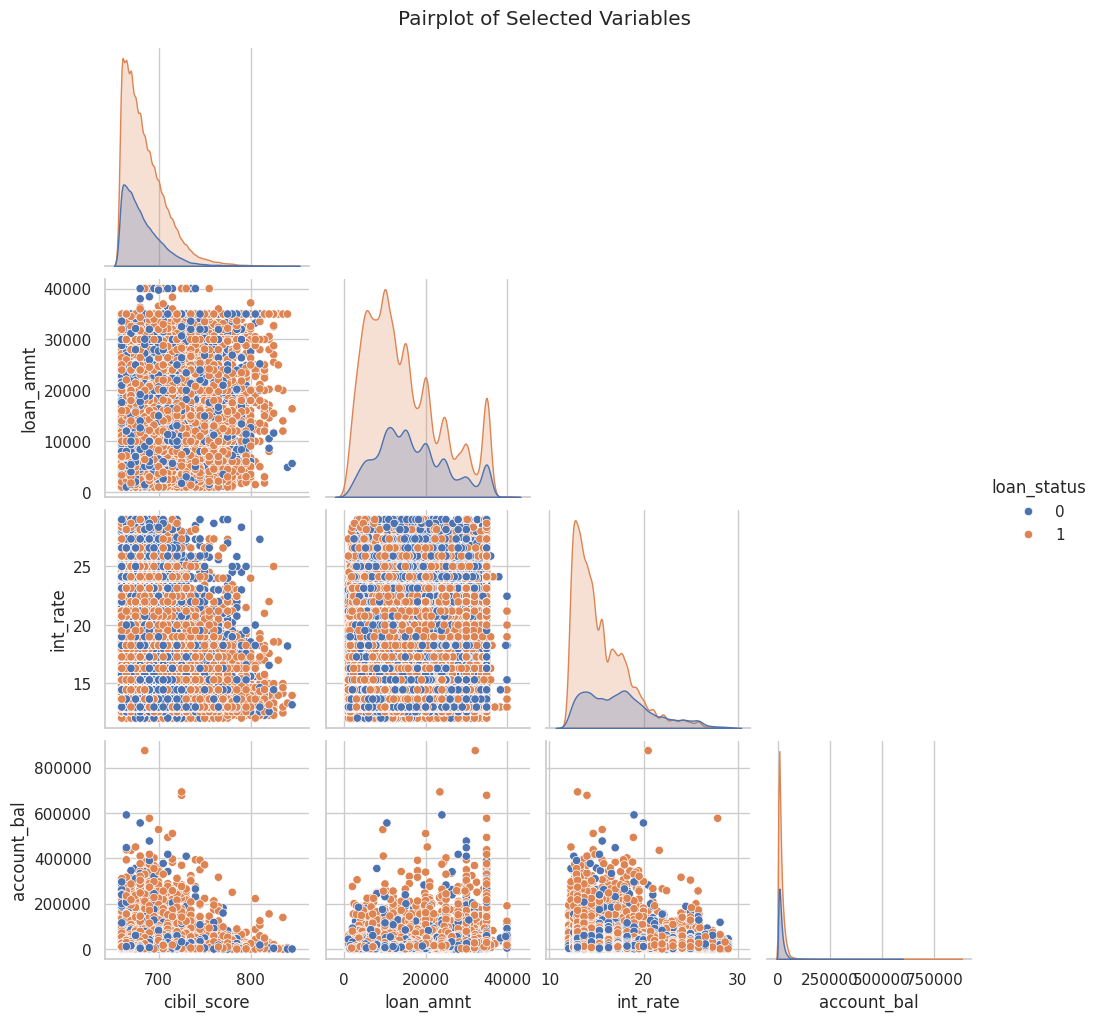

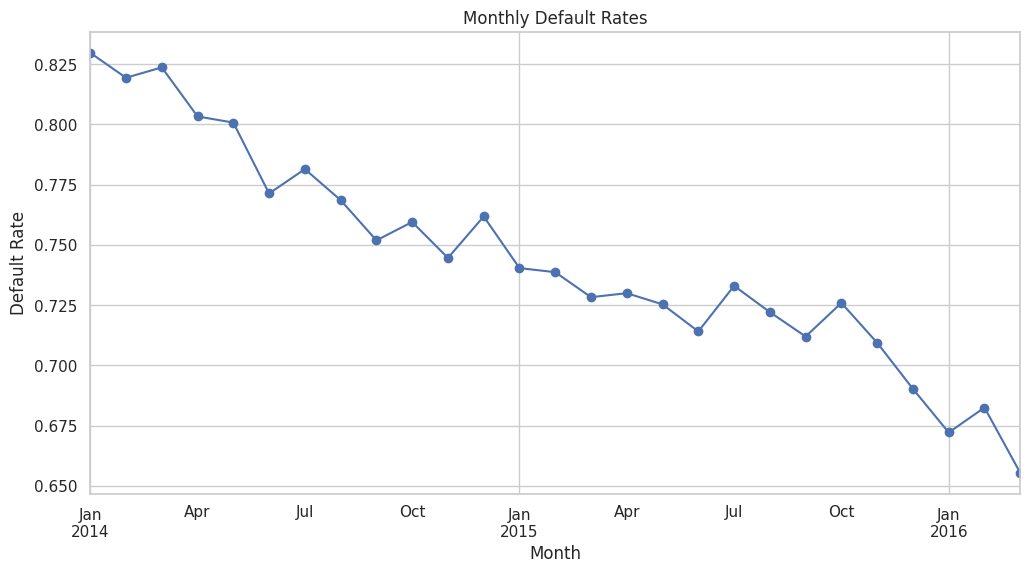

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Setting up visualization aesthetics
sns.set(style="whitegrid")
file_path = '/content/train_data.xlsx'

# 1. Histograms for continuous variables
continuous_vars = ['cibil_score', 'loan_amnt', 'int_rate', 'annual_inc', 'account_bal']
train_data[continuous_vars].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Histograms of Continuous Variables', fontsize=16)
plt.show()

# 2. Boxplots for continuous variables vs. target
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='loan_status', y='cibil_score')
plt.title('Boxplot of CIBIL Score by Loan Status')
plt.show()

# 3. Bar chart for categorical variables
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='home_ownership', hue='loan_status')
plt.title('Home Ownership Distribution by Loan Status')
plt.show()

# 4. Heatmap for correlation between numerical variables
correlation_matrix = train_data[continuous_vars + ['loan_status']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 5. Pairplot for selected numerical variables
selected_vars = ['cibil_score', 'loan_amnt', 'int_rate', 'account_bal', 'loan_status']
sns.pairplot(train_data[selected_vars], hue='loan_status', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

# 6. Time series analysis (if applicable)
train_data['transaction_month'] = train_data['transaction_date'].dt.to_period('M')
monthly_defaults = train_data.groupby('transaction_month')['loan_status'].mean()
plt.figure(figsize=(12, 6))
monthly_defaults.plot(kind='line', marker='o')
plt.title('Monthly Default Rates')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.show()


In [56]:
import pandas as pd
file_path_test = '/content/test_data.xlsx'

# Check sheet names
test_excel = pd.ExcelFile(file_path_test)
print(test_excel.sheet_names)


['Sheet1']


In [57]:
test_data = pd.read_excel(file_path_test, sheet_name='Sheet1')

In [59]:
categorical_columns = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']


In [60]:
print(train_data.columns)  # Check all column names


Index(['customer_id', 'transaction_date', 'sub_grade', 'term',
       'home_ownership', 'cibil_score', 'total_no_of_acc', 'annual_inc',
       'int_rate', 'purpose', 'loan_amnt', 'application_type', 'installment',
       'verification_status', 'account_bal', 'emp_length', 'loan_status',
       'transaction_month'],
      dtype='object')


In [61]:
for col in categorical_columns:
    if train_data[col].isnull().any():
        train_data[col].fillna(train_data[col].mode()[0], inplace=True)
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)


In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    if col in train_data.columns:
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))  # Ensure input is string
        test_data[col] = le.transform(test_data[col].astype(str))  # Transform test data using same encoder
        label_encoders[col] = le  # Save encoder for future use


In [78]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Encoding Categorical Variables
categorical_columns = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']

label_encoders = {}
for col in categorical_columns:
    if col in train_data.columns:  # Ensure the column exists in train_data
        le = LabelEncoder()
        # Fit on training data
        train_data[col] = le.fit_transform(train_data[col].astype(str))

        # Transform test data, assigning -1 for unseen categories
        test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

        # Store the encoder for future use
        label_encoders[col] = le

In [79]:
for col in categorical_columns:
    test_data = test_data[test_data[col].isin(train_data[col].unique())]


In [80]:
print(train_data[col].dtype)
print(test_data[col].dtype)
print(test_data[col].unique())  # Check unique values in the column


int64
int64
[]


In [81]:
train_data[col] = train_data[col].astype(str)
test_data[col] = test_data[col].astype(str)


In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    if col in train_data.columns:
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))  # Fit and transform train data
        # Handle unseen categories in test data
        test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        label_encoders[col] = le  # Store encoder for future use


In [72]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Encoding Categorical Variables
categorical_columns = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']

label_encoders = {}
for col in categorical_columns:
    if col in train_data.columns:  # Ensure the column exists
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))  # Fit and transform train data
        # Handle unseen categories in test data
        test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        label_encoders[col] = le  # Store encoder for future use


In [83]:
for col in categorical_columns:
    valid_classes = train_data[col].unique()
    test_data = test_data[test_data[col].isin(valid_classes)]


In [88]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming train_data and test_data are already loaded and preprocessed up to this point

# Step 3: Scaling Numerical Variables
numerical_columns = ['cibil_score', 'loan_amnt', 'int_rate', 'annual_inc', 'account_bal', 'emp_length']

# Initialize the scaler
scaler = StandardScaler()

# Fit on train data and transform both train and test data
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])  # Use the same scaler for test data

# Verify the scaled data
print(train_data[numerical_columns].head())
print(test_data[numerical_columns].head())


   cibil_score  loan_amnt  int_rate  annual_inc  account_bal  emp_length
0    -0.848174  -0.875364  0.087976   -0.022944    -0.546398    1.191667
1    -1.066790  -1.007359  2.301814   -0.105580    -0.086538    1.191667
2    -1.066790  -0.787367  0.499205    0.026638    -0.045751    1.191667
3     0.244907  -0.567375 -0.960197    0.770368    -0.404865   -0.936218
4    -0.848174  -0.567375 -0.301611   -0.138635    -0.464726    1.191667
   cibil_score  loan_amnt  int_rate  annual_inc  account_bal  emp_length
0     0.244907   0.532585 -0.706657    0.803422    -0.321432    1.191667
1     0.682139  -0.627873  1.247458   -0.167111    -0.679373   -1.409081
2    -1.066790  -0.270386  1.247458    0.340657    -0.410440   -0.699786
3    -0.629558   1.082565 -0.462392    1.299242    -0.382809   -0.699786
4    -1.066790   0.092601  0.938263   -0.055998    -0.350824    1.191667


In [89]:
# Load the test dataset from the correct sheet
test_data = pd.read_excel(file_path_test, sheet_name='Sheet1')  # Updated sheet name

# Step 1: Handling Missing Values
# Dropping rows with missing values in critical columns for both train and test datasets
critical_columns = ['cibil_score', 'loan_amnt', 'int_rate', 'annual_inc', 'account_bal', 'loan_status']
train_data = train_data.dropna(subset=critical_columns)
test_data = test_data.dropna(subset=critical_columns[:-1])  # Exclude 'loan_status' as it's not in test_data

# Fill missing values for non-critical columns
for col in train_data.columns:
    if train_data[col].dtype == 'object':  # Categorical columns
        train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    else:  # Numerical columns
        train_data[col].fillna(train_data[col].median(), inplace=True)

for col in test_data.columns:
    if test_data[col].dtype == 'object':  # Categorical columns
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)
    else:  # Numerical columns
        test_data[col].fillna(test_data[col].median(), inplace=True)

# Step 2: Encoding Categorical Variables
categorical_columns = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)   # Use the same encoder for test data
    label_encoders[col] = le  # Store the encoder for future use

# Step 3: Scaling Numerical Variables
numerical_columns = ['cibil_score', 'loan_amnt', 'int_rate', 'annual_inc', 'account_bal', 'emp_length']
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])  # Use the same scaler for test data

# Displaying processed datasets
train_data.head(), test_data.head()


<ipython-input-89-20a937fa4209>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
<ipython-input-89-20a937fa4209>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

(   customer_id transaction_date  sub_grade  term  home_ownership  cibil_score  \
 0     10608026       2014-01-01          2     0               0    -0.848174   
 1     10235120       2014-01-01          4     0               0    -1.066790   
 2     10705805       2014-01-01         21     0               0    -1.066790   
 3     11044991       2014-01-01          0     0               0     0.244907   
 4     10161054       2014-01-01         25     1               0    -0.848174   
 
    total_no_of_acc  annual_inc  int_rate  purpose  loan_amnt  \
 0                9   -0.022944  0.087976        9  -0.875364   
 1                8   -0.105580  2.301814       10  -1.007359   
 2                7    0.026638  0.499205        4  -0.787367   
 3                5    0.770368 -0.960197        9  -0.567375   
 4                5   -0.138635 -0.301611        9  -0.567375   
 
    application_type  installment  verification_status  account_bal  \
 0                 0       253.99          

In [90]:
print(train_data[numerical_columns].describe())
print(test_data[numerical_columns].describe())


        cibil_score     loan_amnt      int_rate    annual_inc   account_bal  \
count  1.137050e+05  1.137050e+05  1.137050e+05  1.137050e+05  1.137050e+05   
mean   5.499121e-18 -3.499441e-18 -3.199489e-17  1.343535e-18  6.748922e-18   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -1.066790e+00 -1.557339e+00 -1.207553e+00 -1.179856e+00 -7.737116e-01   
25%   -8.481740e-01 -7.873673e-01 -8.117830e-01 -4.691811e-01 -4.971011e-01   
50%   -1.923257e-01 -2.043885e-01 -2.985187e-01 -1.882167e-01 -2.435252e-01   
75%    4.635227e-01  5.573338e-01  5.888720e-01  2.249662e-01  1.888499e-01   
max    7.022006e+00  2.732505e+00  4.030216e+00  1.459143e+02  4.204800e+01   

         emp_length  
count  1.137050e+05  
mean  -2.699569e-17  
std    1.000004e+00  
min   -1.409081e+00  
25%   -9.362178e-01  
50%    9.508835e-03  
75%    1.191667e+00  
max    1.191667e+00  
       cibil_score     loan_amnt     int_rate    annual_inc   account_bal  \
count  8455.0

In [91]:
for col in numerical_columns:
    train_data[col] = train_data[col].clip(lower=train_data[col].quantile(0.01), upper=train_data[col].quantile(0.99))
#outlier detection

In [94]:
from imblearn.over_sampling import SMOTE

# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['number']).columns
X_train_numeric = train_data[numeric_columns].drop(columns=['loan_status'])  # Exclude the target variable
y_train = train_data['loan_status']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_numeric, y_train)

# Verify the resampled data
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")


Resampled X shape: (168032, 15)
Resampled y shape: (168032,)


In [96]:
print(X_train.dtypes)  # Check data types of all columns
print(X_test.dtypes)


customer_id                     int64
transaction_date       datetime64[ns]
sub_grade                       int64
term                            int64
home_ownership                  int64
cibil_score                   float64
total_no_of_acc                 int64
annual_inc                    float64
int_rate                      float64
purpose                         int64
loan_amnt                     float64
application_type                int64
installment                   float64
verification_status             int64
account_bal                   float64
emp_length                    float64
transaction_month           period[M]
dtype: object
customer_id                     int64
transaction_date       datetime64[ns]
sub_grade                       int64
term                            int64
home_ownership                  int64
cibil_score                   float64
total_no_of_acc                 int64
annual_inc                    float64
int_rate                      float6

In [98]:
if 'transaction_year' in X_train.columns:  # Replace 'transaction_year' with the actual column name
    X_train['transaction_year'] = X_train['transaction_year'].astype(int)
    X_test['transaction_year'] = X_test['transaction_year'].astype(int)


In [100]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])


In [101]:
# Check and handle datetime columns
if 'transaction_date' in X_train.columns:
    X_train['transaction_year'] = pd.to_datetime(X_train['transaction_date']).dt.year
    X_test['transaction_year'] = pd.to_datetime(X_test['transaction_date']).dt.year
    X_train = X_train.drop(columns=['transaction_date'])
    X_test = X_test.drop(columns=['transaction_date'])

# Train models (same as before)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


Training Logistic Regression...
Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:35:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.638675   0.638675  1.000000  0.779502  0.558944
1        Random Forest  0.639858   0.642434  0.983519  0.777201  0.543705
2              XGBoost  0.372561   0.595190  0.055000  0.100695  0.465499


As we see that the accuracy of the model trained by the algorithm gives us the best accuricy then other two algorithms and also the recall is less than logistic regression.So i have selected the algorithm of random forst as the final model which is saved into the file of model_.py